# Second order schemes for the multifactor CIR and Heston models

## Simulation du processus CIR

$$\xi_t^x = x + \int_0^t G(0) [a - k \xi^x_s] ds + \int_0^t G(0) \sigma \sqrt{\xi_s^x} dW_s$$

In [36]:
# Some useful imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ncx2

In [123]:
class CIRProcess:
    def __init__(self, a, k, sigma, rho, gamma):
        self.a = a
        self.k = k
        self.sigma = sigma
        self.rho = rho
        self.gamma = gamma
        self.G0 = sum(gamma)
        self.a_bar = a * self.G0
        self.k_bar = k * self.G0
        self.sigma_bar = sigma * self.G0

    def zeta(self, t, k):
        return (1 - np.exp(-k * t)) / k if k != 0 else t

    def w(self, u):
        if u > 5/6:
            return np.sqrt(3)
        elif u <= 1/6:
            return -np.sqrt(3)
        else:
            return 0

    def u1(self, t, x):
        return x * np.exp(-self.k_bar * t) + self.a_bar * self.zeta(t, self.k_bar)

    def u2(self, t, x):
        term1 = self.u1(t, x)**2
        term2 = self.sigma_bar**2 * self.zeta(t, self.k_bar) * (
            self.a_bar * self.zeta(t, self.k_bar) / 2 + x * np.exp(-self.k_bar * t)
        )
        return term1 + term2

    def pi(self, t, x):
        res = 1 - self.u1(t, x)**2 / self.u2(t, x)
        return (1 - np.sqrt(res)) / 2

    def K2(self, t):
        print(self.sigma_bar**2)
        print(4 * self.a_bar)
        print('\n')
        if self.sigma_bar**2 > 4 * self.a_bar:
            term1 = (self.sigma_bar**2 / 4 - self.a_bar) * self.zeta(t / 2, self.k_bar)
            term2 = np.sqrt(
                np.exp(self.k_bar * t / 2) * (self.sigma_bar**2 / 4 - self.a_bar) * self.zeta(t / 2, self.k_bar)
            ) + self.sigma_bar * np.sqrt(3 * t) / 2
            return np.exp(self.k_bar * t / 2) * (term1 + term2**2)
        else:
            return 0

    def phi(self, x, t, u):
        K2_val = self.K2(t)
        print(K2_val)
        if x >= K2_val:
            res = np.sqrt((self.a_bar - self.sigma_bar**2 / 4) * self.zeta(t / 2, self.k_bar) + np.exp(-self.k_bar * t / 2) * x)
            res += self.sigma_bar * np.sqrt(t) * self.w(u) / 2
            res = np.exp(-self.k_bar * t / 2) * (res ** 2)
            res += (self.a_bar - self.sigma_bar**2 / 4) * self.zeta(t / 2, self.k_bar)
            return res
        else:
            p = self.pi(t, x)
            if u <= p:
                return self.u1(t, x) / (2 * p)
            else:
                return self.u1(t, x) / (2 * (1 - p))

    def simulate_path(self, x0, T, N, seed=None):
        if seed is not None:
            np.random.seed(seed)

        dt = T / N
        path = np.zeros(N + 1)
        path[0] = x0

        for i in range(1, N + 1):
            u = np.random.uniform()
            path[i] = self.phi(path[i - 1], dt, u)

        return path

    def simulate_path_euler(self, x0, T, N, seed=None):
        if seed is not None:
            np.random.seed(seed)

        dt = T / N
        path = np.zeros(N + 1)
        path[0] = x0

        for i in range(1, N + 1):
            xi = path[i - 1]
            dW = np.sqrt(dt) * np.random.randn()

            drift = self.G0 * (self.a - self.k * xi)
            diffusion = self.G0 * self.sigma * np.sqrt(max(xi, 0))

            x_new = xi + drift * dt + diffusion * dW
            path[i] = max(x_new, 0)

        return path

G0*sigma^2 = 0.00011200000000000001
4*a = 0.2
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.00012544000000000005
0.22400000000000003


0
0.000125440000

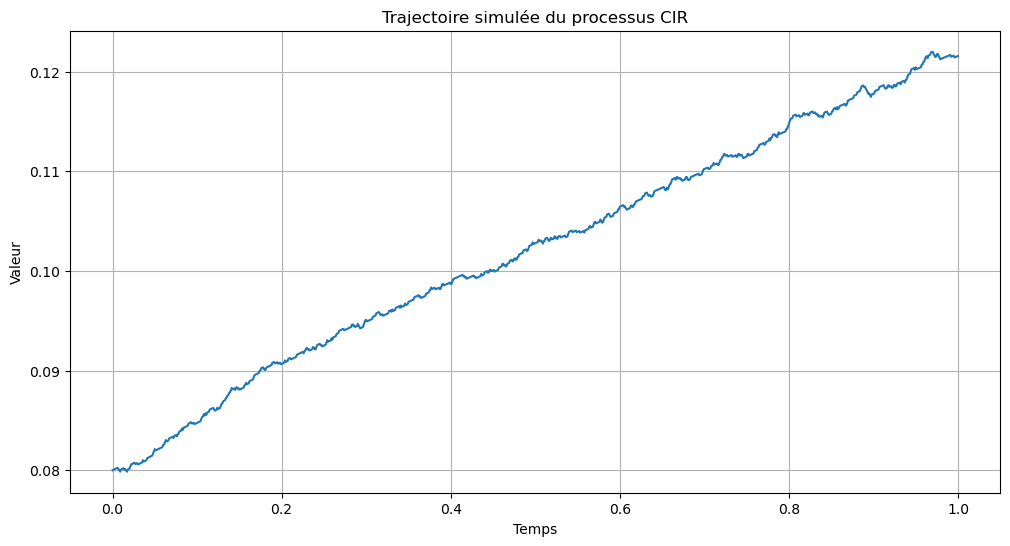

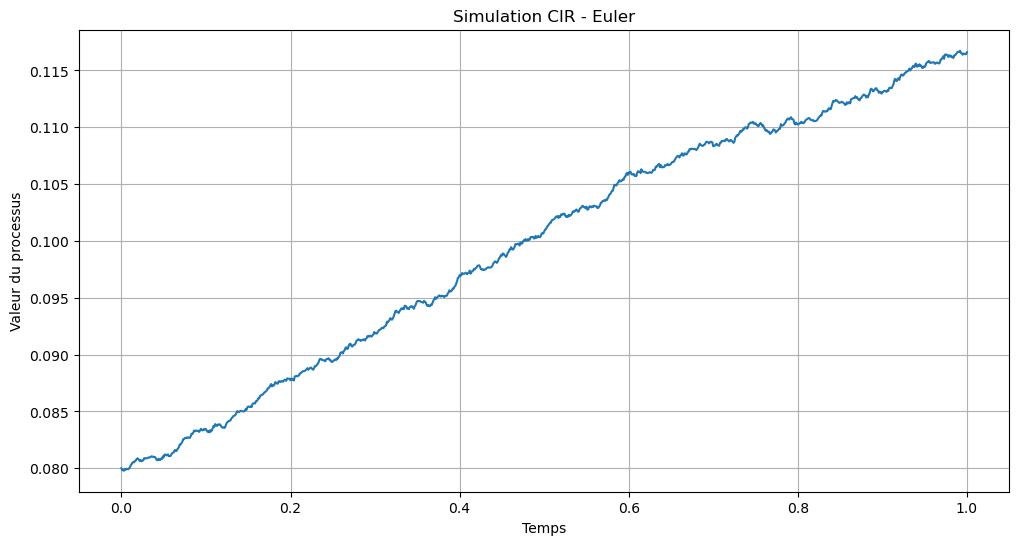

In [130]:
# Parameters for the simulations
a = 0.05
k = 0.15
sigma = 0.01
xi0 = 0.08
T = 1
N = 1000

rho = np.array([0.06, 1.05, 1.79, 2.52, 3.25])
gamma = np.array([0.96, 0.07, 0.04, 0.03, 0.02])

print("G0*sigma^2 =", sum(gamma)*sigma**2)
print("4*a =", 4*a)

# Définition du modèle
cir = CIRProcess(a, k, sigma, rho, gamma)

# Simulations
path = cir.simulate_path(xi0, T, N)

# Affichage
times = np.linspace(0, T, N + 1)
plt.plot(times, path)
plt.title("Trajectoire simulée du processus CIR")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.grid(True)
plt.show()

path_euler = cir.simulate_path_euler(xi0, T, N)

times = np.linspace(0, T, N + 1)
plt.plot(times, path_euler)
plt.title("Simulation CIR - Euler")
plt.xlabel("Temps")
plt.ylabel("Valeur du processus")
plt.grid(True)
plt.show()


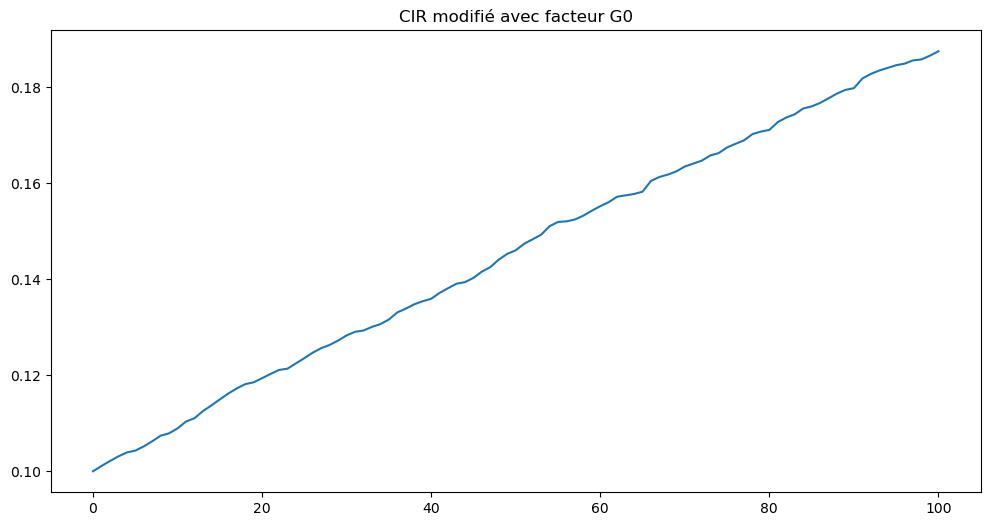

In [56]:
def simulate_CIR_exact_scaled(G0, a, k, sigma, x0, dt, N):
    kappa = k * G0
    theta = a / k
    sigma_ = sigma * G0
    
    X = np.zeros(N+1)
    X[0] = x0
    d = 4 * kappa * theta / (sigma_**2)
    
    for i in range(1, N+1):
        c = (sigma_**2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = (4 * kappa * np.exp(-kappa * dt) * X[i-1]) / (sigma_**2 * (1 - np.exp(-kappa * dt)))
        
        X[i] = c * ncx2.rvs(d, nc)
        
    return X

# Test
a = 0.1
k = 0.15
sigma = 0.01
x0 = 0.1

rho = np.array([0.06, 1.05, 1.79, 2.52, 3.25])
gamma = np.array([0.96, 0.07, 0.04, 0.03, 0.02])

G0 = sum(gamma)

dt = 0.01
N = 100

path = simulate_CIR_exact_scaled(G0, a, k, sigma, x0, dt, N)

import matplotlib.pyplot as plt
plt.plot(path)
plt.title("CIR modifié avec facteur G0")
plt.show()